# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [57]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [58]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)

In [59]:
feat_df <- read.table("../../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/PS_sel_one_wayANOVA_hMinImp_TICnorm_groupFil0.3_RPneg_fullreport.csv"
        ,header = TRUE, sep = ',')

In [60]:
head(feat_df)

,id_number,X.M.H.,Species.Shorthand,Formula,Neutral_Mass,Common.Name,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,log2FC_CD8stemvsTn,log2FC_CD8transvsTn,log2FC_CD8TDvsTn,log2FC_CD8transvsCD8stem,log2FC_CD8TDvsCD8stem,log2FC_CD8TDvsCD8trans,f_score,pval,padj,Tpadj_CD8TD.CD8stem,Tpadj_CD8trans.CD8stem,Tpadj_Tn.CD8stem,Tpadj_CD8trans.CD8TD,Tpadj_Tn.CD8TD,Tpadj_Tn.CD8trans,TFDR_CD8TD.CD8stem,TFDR_CD8trans.CD8stem,TFDR_Tn.CD8stem,TFDR_CD8trans.CD8TD,TFDR_Tn.CD8TD,TFDR_Tn.CD8trans,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F10088,706.5023,PS O-31:0,C37H74NO9P,707.5101,PS(O-16:0/15:0);PS(O-18:0/13:0),22.54975,22.24230,22.23288,21.81227,-0.3074480,-0.3168746,-0.7374836,-0.009426587,-0.4300356,-0.42060901,7.7270478,0.03855527,0.1736291,0.15095106,0.9999036,0.3233717,0.1598545,0.02927250,0.3048600,0.4918440,1,1,0.5620908,0.1935307,1,21.76329,21.86124,22.15218,22.33243,22.05573,22.41003,22.47504,22.62447,22.23000,22.06893,21.66625
2,F10378,798.5285,PS 37:3,C43H78NO10P,799.5363,"PS(15:1(9Z)/22:2(13Z,16Z));PS(17:0/20:3(8Z,11Z,14Z));PS(17:1(9Z)/20:2(11Z,14Z));PS(17:2(9Z,12Z)/20:1(11Z));PS(18:2(9Z,12Z)/19:1(9Z));PS(18:3(6Z,9Z,12Z)/19:0);PS(18:3(9Z,12Z,15Z)/19:0);PS(19:0/18:3(6Z,9Z,12Z));PS(19:0/18:3(9Z,12Z,15Z));PS(19:1(9Z)/18:2(9Z,12Z));PS(20:1(11Z)/17:2(9Z,12Z));PS(20:2(11Z,14Z)/17:1(9Z));PS(20:3(8Z,11Z,14Z)/17:0);PS(22:2(13Z,16Z)/15:1(9Z))",19.06636,19.48094,18.38050,17.41191,0.4145838,-0.6858581,-1.6544459,-1.100441987,-2.0690298,-0.96858778,12.9191348,0.01588858,0.1165329,0.01482774,0.1143176,0.6755609,0.1609039,0.03225815,0.3449621,0.1857507,1,1,0.5631005,0.2023855,1,17.08924,17.73458,19.49869,19.46319,18.76382,17.99717,19.02478,19.10794,18.58974,19.04283,19.35432
3,F10486,734.5336,PS O-33:0,C39H78NO9P,735.5414,PS(O-18:0/15:0);PS(O-20:0/13:0);PS(O-16:0/17:0),21.70652,21.27973,21.17554,20.71313,-0.4267911,-0.5309791,-0.9933878,-0.104188036,-0.5665968,-0.46240875,10.6176652,0.02245142,0.1353765,0.10384740,0.9305425,0.2165343,0.1786553,0.01684622,0.1245155,0.4162777,1,1,0.5967125,0.1529655,1,20.50078,20.92549,21.16842,21.39104,21.14028,21.21081,21.64365,21.76940,21.34766,20.93304,20.73375
4,F11304,768.5179,PS O-36:4,C42H76NO9P,769.5258,"PS(O-18:0/18:4(6Z,9Z,12Z,15Z));PS(P-16:0/20:3(8Z,11Z,14Z));PS(P-18:0/18:3(6Z,9Z,12Z));PS(P-18:0/18:3(9Z,12Z,15Z));PS(O-16:0/20:4(5Z,8Z,11Z,14Z))",18.88689,20.00413,19.68771,19.77977,1.1172366,0.8008120,0.8928817,-0.316424627,-0.2243550,0.09206966,0.6427718,0.62673440,0.7261270,0.99280597,0.9806607,0.6078462,0.9994842,0.73899975,0.7914897,1.0000000,1,1,1.0000000,1.0000000,1,18.88689,20.67266,19.81125,20.19701,18.88689,20.48852,18.88689,18.88689,18.88689,19.88689,18.88689
5,F11498,810.5285,PS 38:4,C44H78NO10P,811.5363,"PS(18:0/20:4(5Z,8Z,11Z,14Z));PS(18:1(9Z)/20:3(8Z,11Z,14Z));PS(18:2(9Z,12Z)/20:2(11Z,14Z));PS(18:3(6Z,9Z,12Z)/20:1(11Z));PS(18:3(9Z,12Z,15Z)/20:1(11Z));PS(18:4(6Z,9Z,12Z,15Z)/20:0);PS(20:1(11Z)/18:3(6Z,9Z,12Z));PS(20:1(11Z)/18:3(9Z,12Z,15Z));PS(20:2(11Z,14Z)/18:2(9Z,12Z));PS(20:3(8Z,11Z,14Z)/18:1(9Z));PS(20:4(5Z,8Z,11Z,14Z)/18:0);PS(22:4(7Z,10Z,13Z,16Z)/16:0);PS(20:0/18:4(6Z,9Z,12Z,15Z));PS(16:0/22:4(7Z,10Z,13Z,16Z))",22.04917,21.30051,22.90533,21.10479,-0.7486614,0.8561555,-0.9443837,1.604816901,-0.1957222,-1.80053912,0.3950283,0.76429228,0.8180885,0.99949737,0.8200796,0.9744914,0.7695974,0.95175283,0.9630217,1.0000000,1,1,1.0000000,1.0000000,1,22.80002,19.40956,23.19147,19.40956,22.33489,23.47578,22.15057,21.94778,22.46777,22.55083,22.76086
6,F11849,772.5492,PS O-36:2,C42H80NO9P,773.5571,"PS(O-16:0/20:2(11Z,14Z));PS(O-18:0/18:2(9Z,12Z));PS(P-16:0/20:1(11Z));PS(P-20:0/16:1(9Z));PS(P-18:0/18:1(9Z))",20.94223,20.16111,20.79937,21.35875,-0.7811137,-0.

In [61]:
feat_df[duplicated(feat_df$id_number),]

,id_number,X.M.H.,Species.Shorthand,Formula,Neutral_Mass,Common.Name,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,log2FC_CD8stemvsTn,log2FC_CD8transvsTn,log2FC_CD8TDvsTn,log2FC_CD8transvsCD8stem,log2FC_CD8TDvsCD8stem,log2FC_CD8TDvsCD8trans,f_score,pval,padj,Tpadj_CD8TD.CD8stem,Tpadj_CD8trans.CD8stem,Tpadj_Tn.CD8stem,Tpadj_CD8trans.CD8TD,Tpadj_Tn.CD8TD,Tpadj_Tn.CD8trans,TFDR_CD8TD.CD8stem,TFDR_CD8trans.CD8stem,TFDR_Tn.CD8stem,TFDR_CD8trans.CD8TD,TFDR_Tn.CD8TD,TFDR_Tn.CD8trans,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,F1779,524.2988,LPS O-18:1;O,C24H48NO9P,525.3067,1-(2-methoxy-6Z-heptadecenyl)-sn-glycero-3-phosphoserine,21.47808,21.1898,21.48017,22.08658,-0.2882738,0.002097726,0.6085051,0.2903715,0.8967789,0.6064074,13.49784,0.01469195,0.1125608,0.01197576,0.3223735,0.3268816,0.04613431,0.04562045,0.9999987,0.1679118,1,1,0.3320958,0.2340033,1,22.27786,21.89531,21.21818,21.16143,21.44646,21.51388,21.41731,21.53884,21.35034,21.47389,21.50969


In [62]:
feat_df = feat_df[!duplicated(feat_df$id_number),]

In [63]:
rownames(feat_df) = feat_df$Species.Shorthand

In [64]:
rownames(feat_df)

[1] "PS O-31:0"    "PS 37:3"      "PS O-33:0"    "PS O-36:4"    "PS 38:4"     
 [6] "PS O-36:2"    "PS 39:6"      "PS 33:0"      "PS O-37:3"    "PS 40:7"     
[11] "PS 36:1"      "PS O-37:1"    "PS 39:3"      "PS 40:5"      "PS 42:2"     
[16] "PS 40:4"      "PS 43:6"      "PS 43:4"      "PS 41:7"      "PS 40:0"     
[21] "PS 41:6"      "PS 44:6"      "PS 44:5"      "PS 41:4"      "PS 44:3"     
[26] "PS O-42:3"    "LPS O-16:0"   "PS 42:9"      "PS 42:8"      "PS 42:5"     
[31] "LPS 18:0"     "LPS O-19:0;O" "LPS O-16:0;O" "PS O-28:1"    "LPS 22:4"    
[36] "PS 28:0"      "PS 29:0"      "PS O-35:3"    "PS O-38:5"    "PS 32:3"

In [65]:
meta_df <- read.table("../../../../seq/RPneg_addgrp.csv",
                     header = TRUE, sep = ',') 

In [66]:
head(meta_df,5)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2


In [67]:
sample_names = colnames(feat_df)[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
[5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"

[1] 8

[1] "padj"                   "Tpadj_CD8TD.CD8stem"    "Tpadj_CD8trans.CD8stem"
[4] "Tpadj_Tn.CD8stem"       "Tpadj_CD8trans.CD8TD"   "Tpadj_Tn.CD8TD"        
[7] "Tpadj_Tn.CD8trans"

In [68]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [69]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[meta_df$Sample_ID_upd %in% sample_names,]

# Define filtering level - pval

In [70]:
filtered_level = 0.05
feat_df.filt = feat_df[feat_df$pval < filtered_level & !is.na(feat_df$pval),]

In [71]:
dim(feat_df.filt)

[1] 24 42

## subset datatable with only data values

In [72]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [73]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [74]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.791953  2.118691

#### columns and rows annotation

In [75]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [76]:
unique(meta_df$group)

[1] "Tn"       "CD8stem"  "CD8trans" "CD8TD"

## Since the metadata is not exclusively the data 

In [77]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [78]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [79]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'group') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [80]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'group')

In [81]:
annotation_col = data.frame(group = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [82]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [83]:
annotation_col$group

[1] "CD8TD"    "CD8TD"    "CD8stem"  "CD8stem"  "CD8trans" "CD8trans" "Tn"      
[8] "Tn"

#### Annotation of rows (here don't have these)

In [84]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [85]:
group = c("#888888","#0000ff","#FFA500","#ff0000")
names(group) = c("Tn","CD8stem","CD8trans","CD8TD")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [86]:
ann_colors = list(group = group)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [87]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.791953  2.118691

In [88]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2.1
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2.1

In [89]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.791953  2.100000

In [90]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [91]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [92]:
out_dir = "../../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/PSonly_heatmap/"
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_pval{filtered_level}_heatmap.pdf"))

Warning message in dir.create(out_dir):
“'../../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/PSonly_heatmap' already exists”


In [93]:
ann_colors

$group
       Tn   CD8stem  CD8trans     CD8TD 
"#888888" "#0000ff" "#FFA500" "#ff0000"

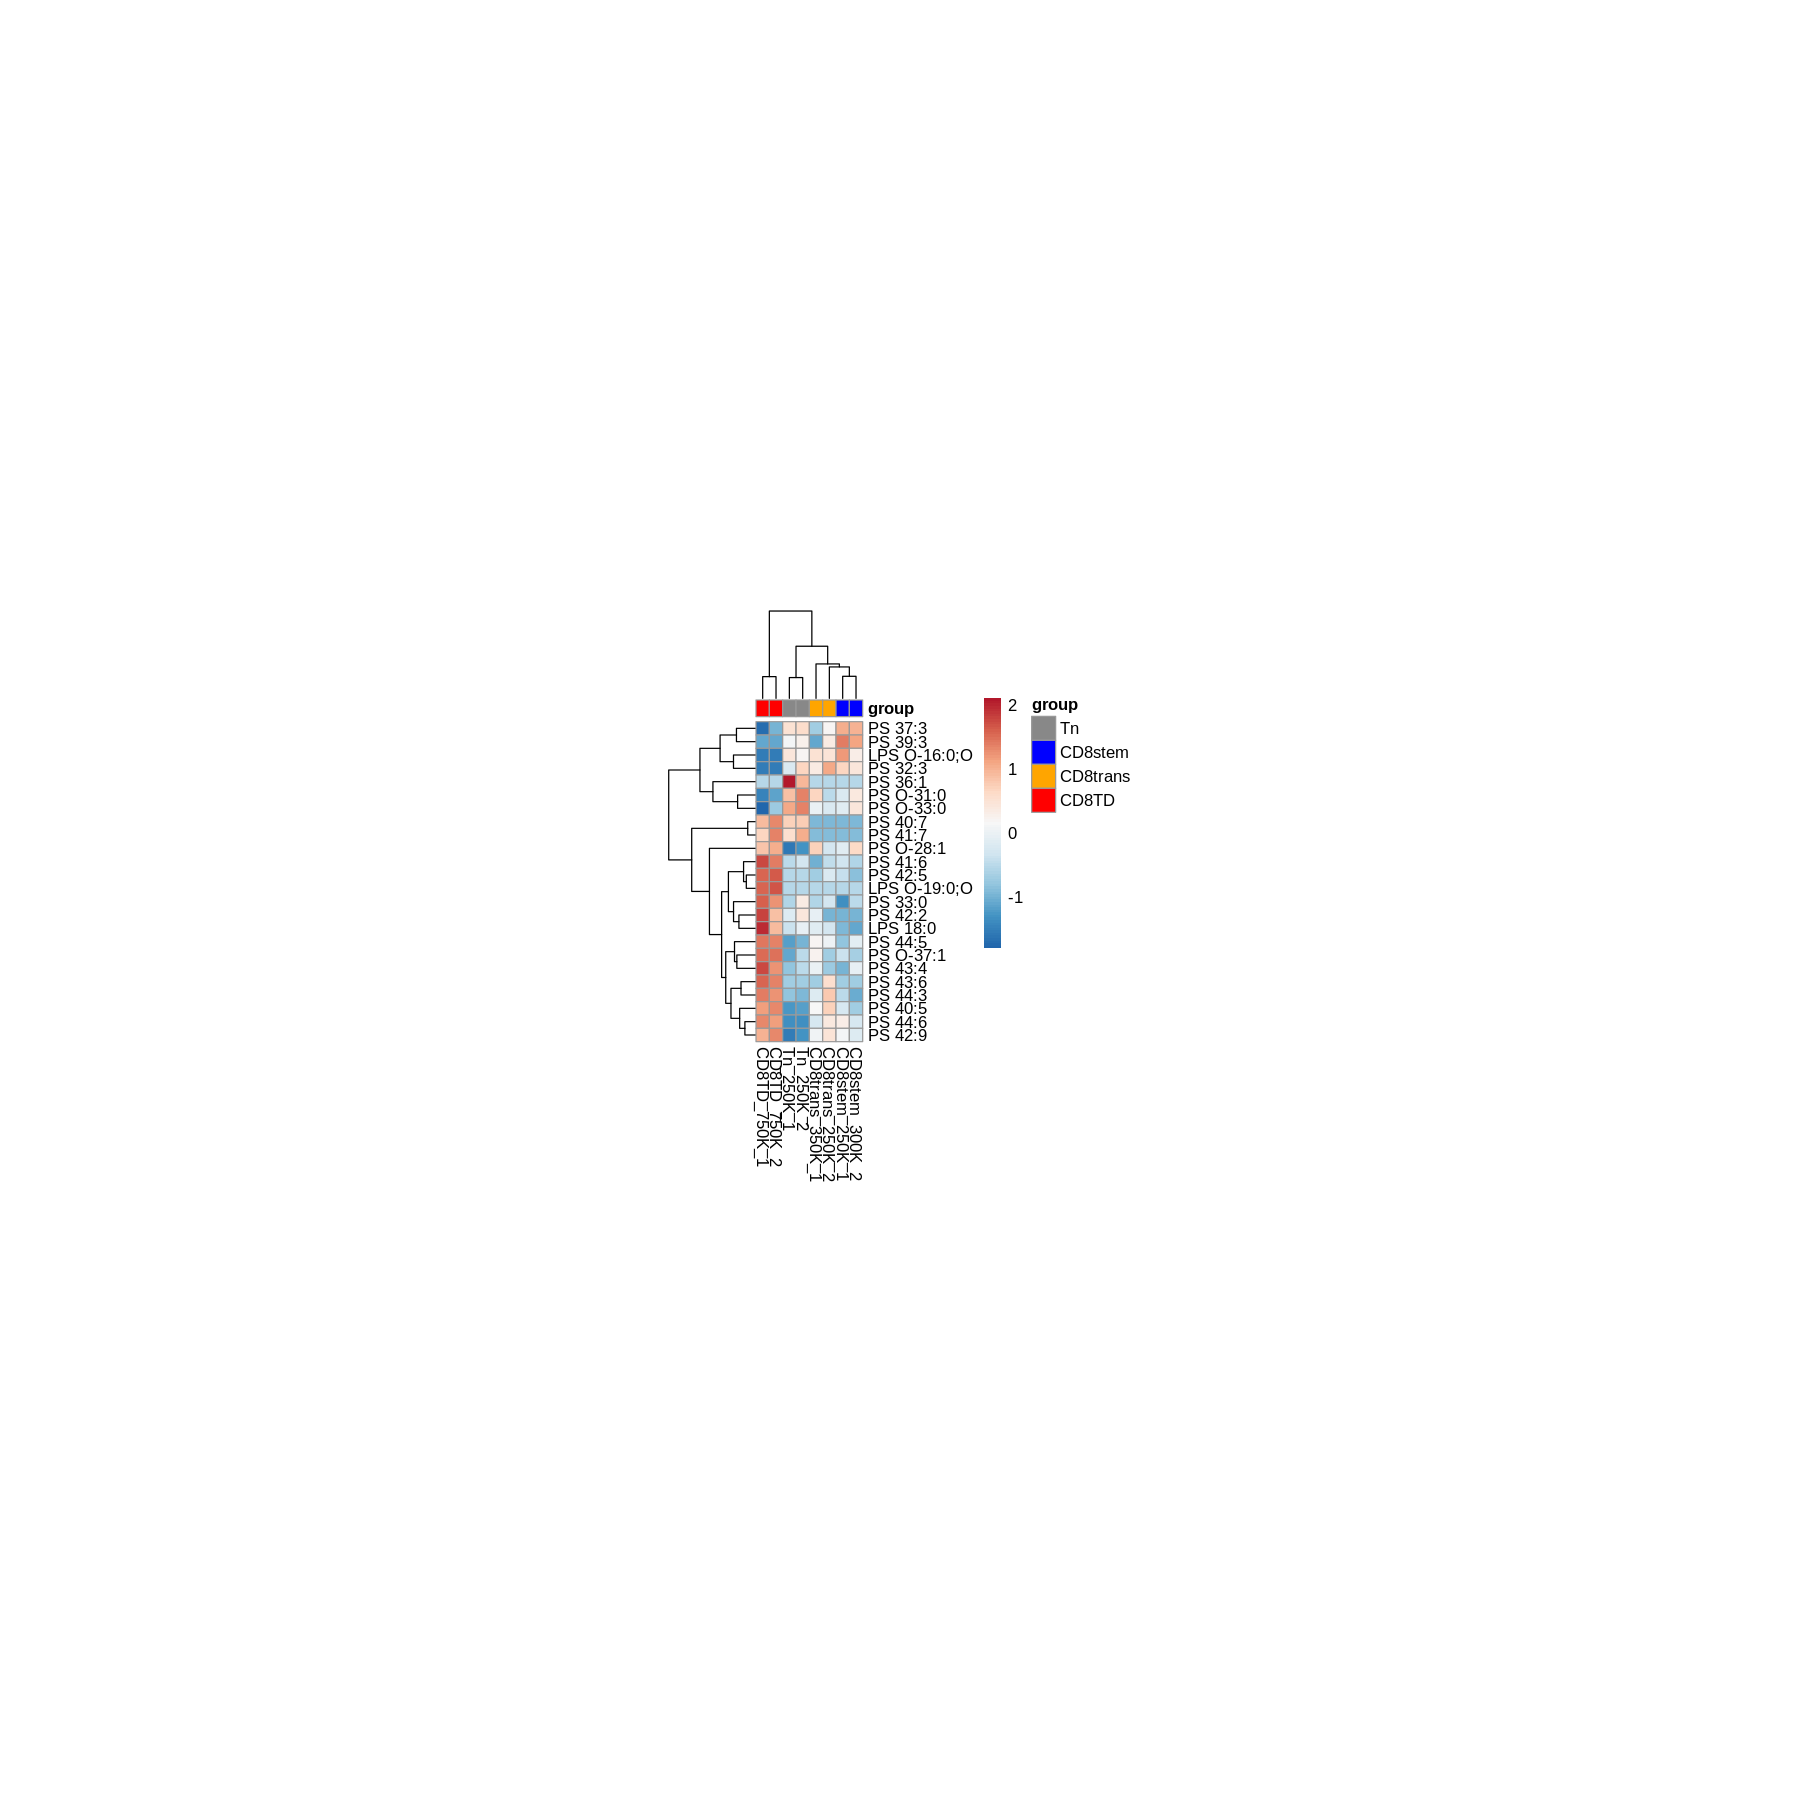

In [94]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 8,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----